In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
df = pdr.get_data_yahoo("AAPL", start="2020-01-01", end="2020-06-21")
print(df.shape)
df.head()

[*********************100%***********************]  1 of 1 completed
(118, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,296.239990,300.600006,295.190002,300.350006,298.829956,33870100
2020-01-03,297.149994,300.579987,296.500000,297.429993,295.924713,36580700
2020-01-06,293.790009,299.959991,292.750000,299.799988,298.282715,29596800
2020-01-07,299.839996,300.899994,297.480011,298.390015,296.879883,27218000
2020-01-08,297.160004,304.440002,297.160004,303.190002,301.655548,33019800


C:\Users\Prasad\Anaconda3\envs\forml\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


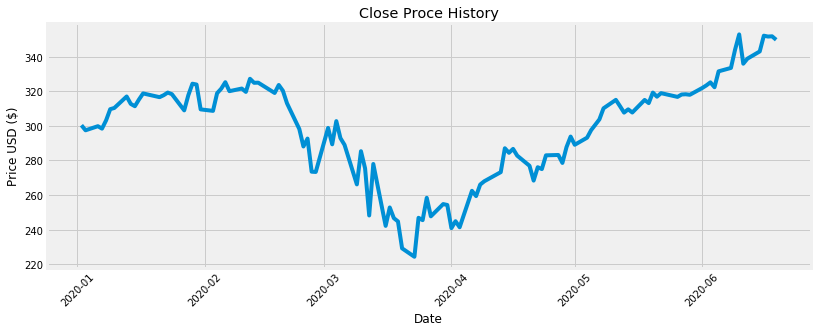

In [3]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Proce History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [4]:
#Calculate MACD and Singnal line
ShortEMA = df['Close'].ewm(span=12, adjust=False).mean()
LongEMA = df['Close'].ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9,adjust=False).mean()

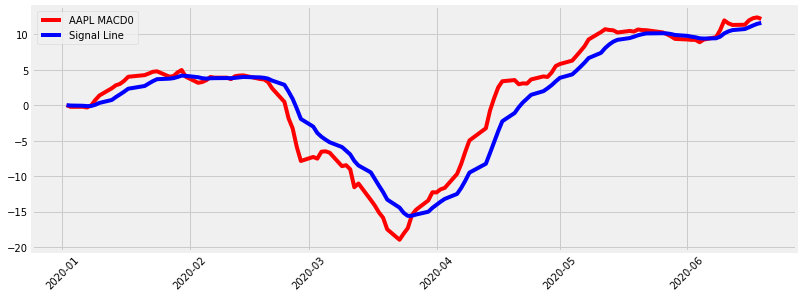

In [5]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD0', color='red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [6]:
df['MACD'] = MACD
df['Signal'] = signal
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
Date,,,,,,,,
2020-01-02,296.239990,300.600006,295.190002,300.350006,298.829956,33870100,0.000000,0.000000
2020-01-03,297.149994,300.579987,296.500000,297.429993,295.924713,36580700,-0.232936,-0.046587
2020-01-06,293.790009,299.959991,292.750000,299.799988,298.282715,29596800,-0.223721,-0.082014
2020-01-07,299.839996,300.899994,297.480011,298.390015,296.879883,27218000,-0.326428,-0.130897
2020-01-08,297.160004,304.440002,297.160004,303.190002,301.655548,33019800,-0.020272,-0.108772


In [7]:
def buy_sell(signal):
    buy = []
    sell = []
    flag = -1
    
    for i in range(0,len(signal)):
        if signal['MACD'][i] > signal['Signal'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
                
        elif signal['MACD'][i] < signal['Signal'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
                
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy,sell

In [8]:
bs_signal = buy_sell(df)
df['Buy_Signal_Price'] = bs_signal[0]
df['Sell_Signal_Price'] = bs_signal[1]
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,296.239990,300.600006,295.190002,300.350006,298.829956,33870100,0.000000,0.000000,NaN,NaN
2020-01-03,297.149994,300.579987,296.500000,297.429993,295.924713,36580700,-0.232936,-0.046587,NaN,297.429993
2020-01-06,293.790009,299.959991,292.750000,299.799988,298.282715,29596800,-0.223721,-0.082014,NaN,NaN
2020-01-07,299.839996,300.899994,297.480011,298.390015,296.879883,27218000,-0.326428,-0.130897,NaN,NaN
2020-01-08,297.160004,304.440002,297.160004,303.190002,301.655548,33019800,-0.020272,-0.108772,303.190002,NaN


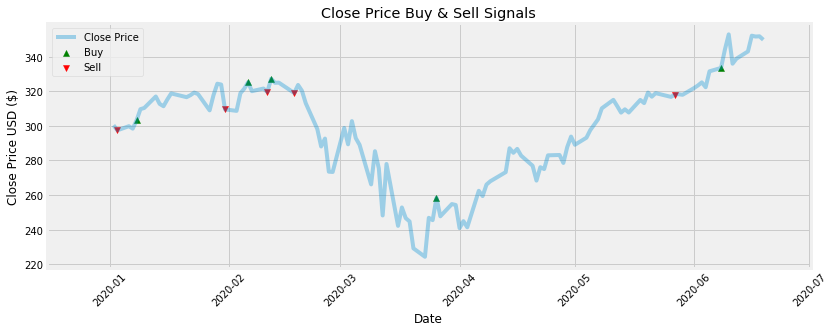

In [9]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()